In [10]:
library(Seurat)
library(infercnv)
library(ggplot2)

options(scipen = 100) #to prevent scientific notation issues that can interfere with the hierarchical clustering process.


In [11]:
seurat_obj <- readRDS("./in/inferCNV_inputs/subsampled_seurat.rds")

In [9]:

# create InferCNV object
infercnv_obj = CreateInfercnvObject(raw_counts_matrix="./in/inferCNV_inputs/merged_gene_matrix.txt",
                                    annotations_file="./in/inferCNV_inputs/merged_annotation.txt",
                                    delim="\t",
                                    gene_order_file="./in/inferCNV_inputs/inferCNV_gene_order.txt",
                                    ref_group_names=c("immune cells"))


INFO [2024-12-25 13:04:07] Parsing matrix: ./in/inferCNV_inputs/merged_gene_matrix.txt
INFO [2024-12-25 13:04:08] Parsing gene order file: ./in/inferCNV_inputs/inferCNV_gene_order.txt
INFO [2024-12-25 13:04:08] Parsing cell annotations file: ./in/inferCNV_inputs/merged_annotation.txt
INFO [2024-12-25 13:04:08] ::order_reduce:Start.
INFO [2024-12-25 13:04:08] .order_reduce(): expr and order match.
INFO [2024-12-25 13:04:08] ::process_data:order_reduce:Reduction from positional data, new dimensions (r,c) = 30133,377 Total=2100478 Min=0 Max=1368.
INFO [2024-12-25 13:04:08] num genes removed taking into account provided gene ordering list: 980 = 3.25224836557927% removed.
INFO [2024-12-25 13:04:08] -filtering out cells < 100 or > Inf, removing 0 % of cells
INFO [2024-12-25 13:04:08] validating infercnv_obj


In [ ]:
infercnv_obj = infercnv::run(infercnv_obj,
                             cutoff=0.1,  
                             out_dir="./out/inferCNV_output", 
                             cluster_by_groups=T,  
                             denoise=T,
                             HMM=T, # set true if high RAM available
                             num_threads = 10)

In [35]:
seurat_obj_infercnv <- infercnv::add_to_seurat(infercnv_output_path="./out/inferCNV_output/", 
                                                seurat_obj=seurat_obj, 
                                                top_n=20)

In [50]:
colnames(seurat_obj_infercnv@meta.data)

[1] "orig.ident"                    "nCount_RNA"                   
  [3] "nFeature_RNA"                  "CANCER_TYPE"                  
  [5] "RNA_snn_res.0.1"               "seurat_clusters"              
  [7] "pANN"                          "DFC"                          
  [9] "percent.mt"                    "RNA_snn_res.0.05"             
 [11] "RNA_snn_res.0.2"               "RNA_snn_res.0.3"              
 [13] "RNA_snn_res.0.4"               "RNA_snn_res.0.5"              
 [15] "RNA_snn_res.0.6"               "RNA_snn_res.0.7"              
 [17] "RNA_snn_res.0.8"               "RNA_snn_res.0.9"              
 [19] "immune_status"                 "has_cnv_chr1"                 
 [21] "has_loss_chr1"                 "has_dupli_chr1"               
 [23] "proportion_cnv_chr1"           "proportion_loss_chr1"         
 [25] "proportion_dupli_chr1"         "proportion_scaled_cnv_chr1"   
 [27] "proportion_scaled_loss_chr1"   "proportion_scaled_dupli_chr1" 
 [29] "has_cnv_chr2"                  "has_loss_chr2"                
 [31] "has_dupli_chr2"                "proportion_cnv_chr2"          
 [33] "proportion_loss_chr2"          "proportion_dupli_chr2"        
 [35] "proportion_scaled_cnv_chr2"    "proportion_scaled_loss_chr2"  
 [37] "proportion_scaled_dupli_chr2"  "has_cnv_chr3"                 
 [39] "has_loss_chr3"                 "has_dupli_chr3"               
 [41] "proportion_cnv_chr3"           "proportion_loss_chr3"         
 [43] "proportion_dupli_chr3"         "proportion_scaled_cnv_chr3"   
 [45] "proportion_scaled_loss_chr3"   "proportion_scaled_dupli_chr3" 
 [47] "has_cnv_chr4"                  "has_loss_chr4"                
 [49] "has_dupli_chr4"                "proportion_cnv_chr4"          
 [51] "proportion_loss_chr4"          "proportion_dupli_chr4"        
 [53] "proportion_scaled_cnv_chr4"    "proportion_scaled_loss_chr4"  
 [55] "proportion_scaled_dupli_chr4"  "has_cnv_chr5"                 
 [57] "has_loss_chr5"                 "has_dupli_chr5"               
 [59] "proportion_cnv_chr5"           "proportion_loss_chr5"         
 [61] "proportion_dupli_chr5"         "proportion_scaled_cnv_chr5"   
 [63] "proportion_scaled_loss_chr5"   "proportion_scaled_dupli_chr5" 
 [65] "has_cnv_chr6"                  "has_loss_chr6"                
 [67] "has_dupli_chr6"                "proportion_cnv_chr6"          
 [69] "proportion_loss_chr6"          "proportion_dupli_chr6"        
 [71] "proportion_scaled_cnv_chr6"    "proportion_scaled_loss_chr6"  
 [73] "proportion_scaled_dupli_chr6"  "has_cnv_chr7"                 
 [75] "has_loss_chr7"                 "has_dupli_chr7"               
 [77] "proportion_cnv_chr7"           "proportion_loss_chr7"         
 [79] "proportion_dupli_chr7"         "proportion_scaled_cnv_chr7"   
 [81] "proportion_scaled_loss_chr7"   "proportion_scaled_dupli_chr7" 
 [83] "has_cnv_chr8"                  "has_loss_chr8"                
 [85] "has_dupli_chr8"                "proportion_cnv_chr8"          
 [87] "proportion_loss_chr8"          "proportion_dupli_chr8"        
 [89] "proportion_scaled_cnv_chr8"    "proportion_scaled_loss_chr8"  
 [91] "proportion_scaled_dupli_chr8"  "has_cnv_chr9"                 
 [93] "has_loss_chr9"                 "has_dupli_chr9"               
 [95] "proportion_cnv_chr9"           "proportion_loss_chr9"         
 [97] "proportion_dupli_chr9"         "proportion_scaled_cnv_chr9"   
 [99] "proportion_scaled_loss_chr9"   "proportion_scaled_dupli_chr9" 
[101] "has_cnv_chr10"                 "has_loss_chr10"               
[103] "has_dupli_chr10"               "proportion_cnv_chr10"         
[105] "proportion_loss_chr10"         "proportion_dupli_chr10"       
[107] "proportion_scaled_cnv_chr10"   "proportion_scaled_loss_chr10" 
[109] "proportion_scaled_dupli_chr10" "has_cnv_chr11"                
[111] "has_loss_chr11"                "has_dupli_chr11"              
[113] "proportion_cnv_chr11"          "proportion_loss_chr11"        
[115] "propo

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


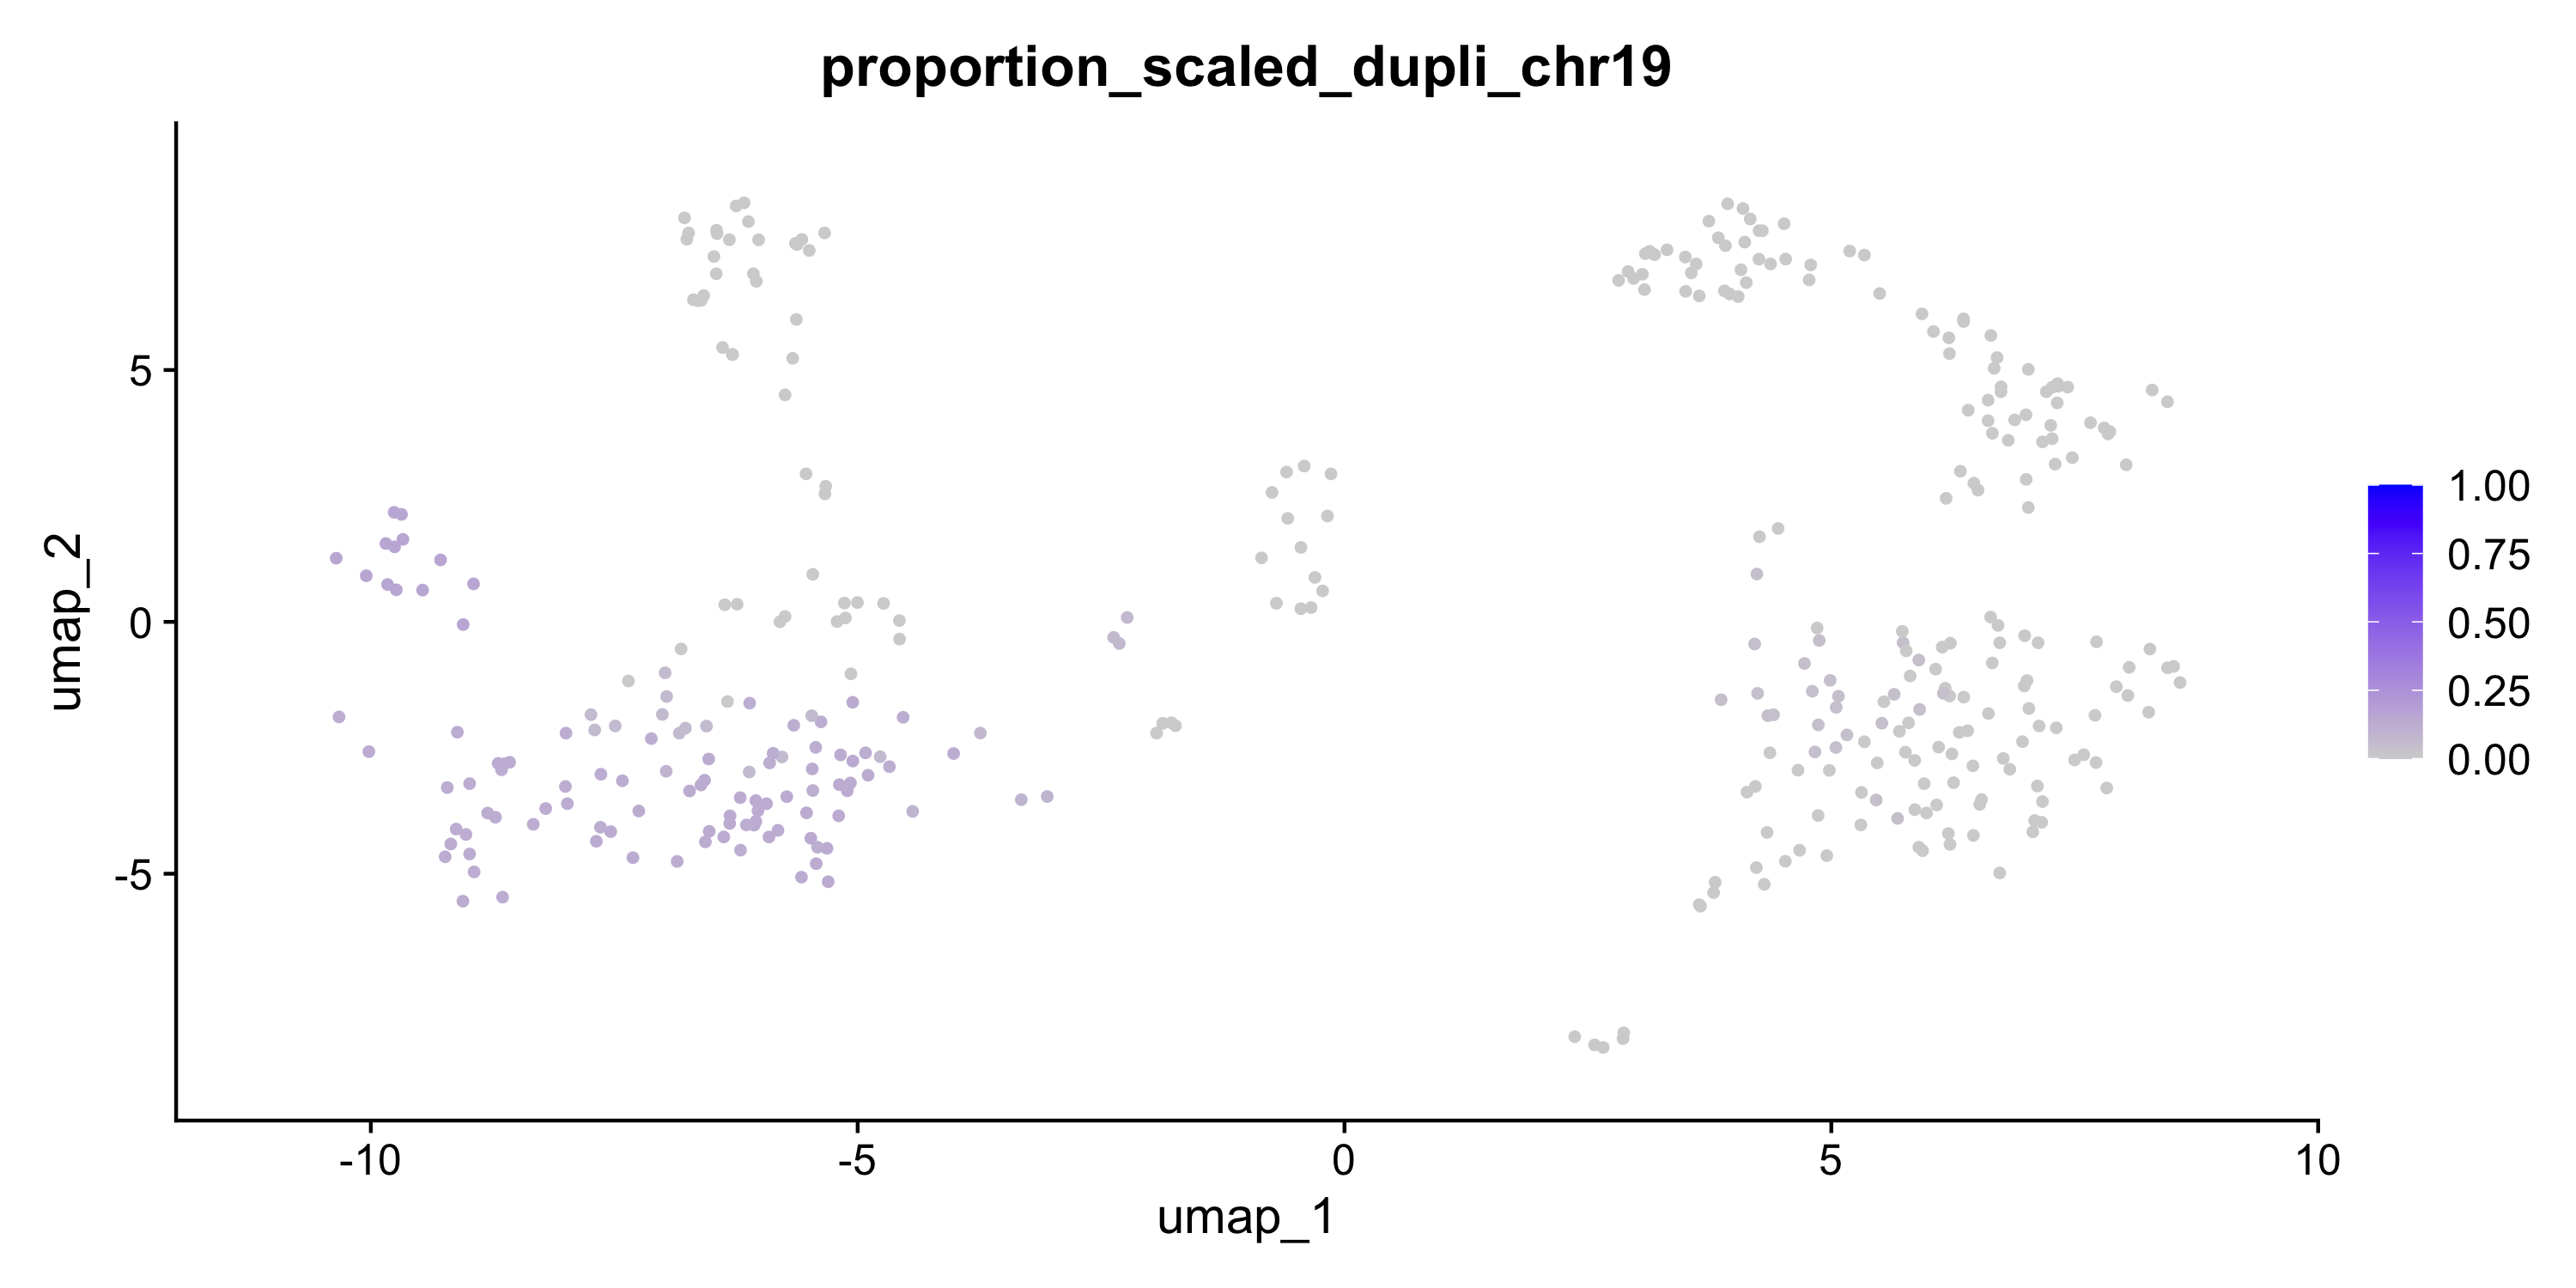

In [98]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 300)
p <- FeaturePlot(seurat_obj_infercnv, reduction="umap", features="proportion_scaled_dupli_chr19") + ggplot2::scale_color_gradient(low="lightgrey", high="blue", limits=c(0,1))
p

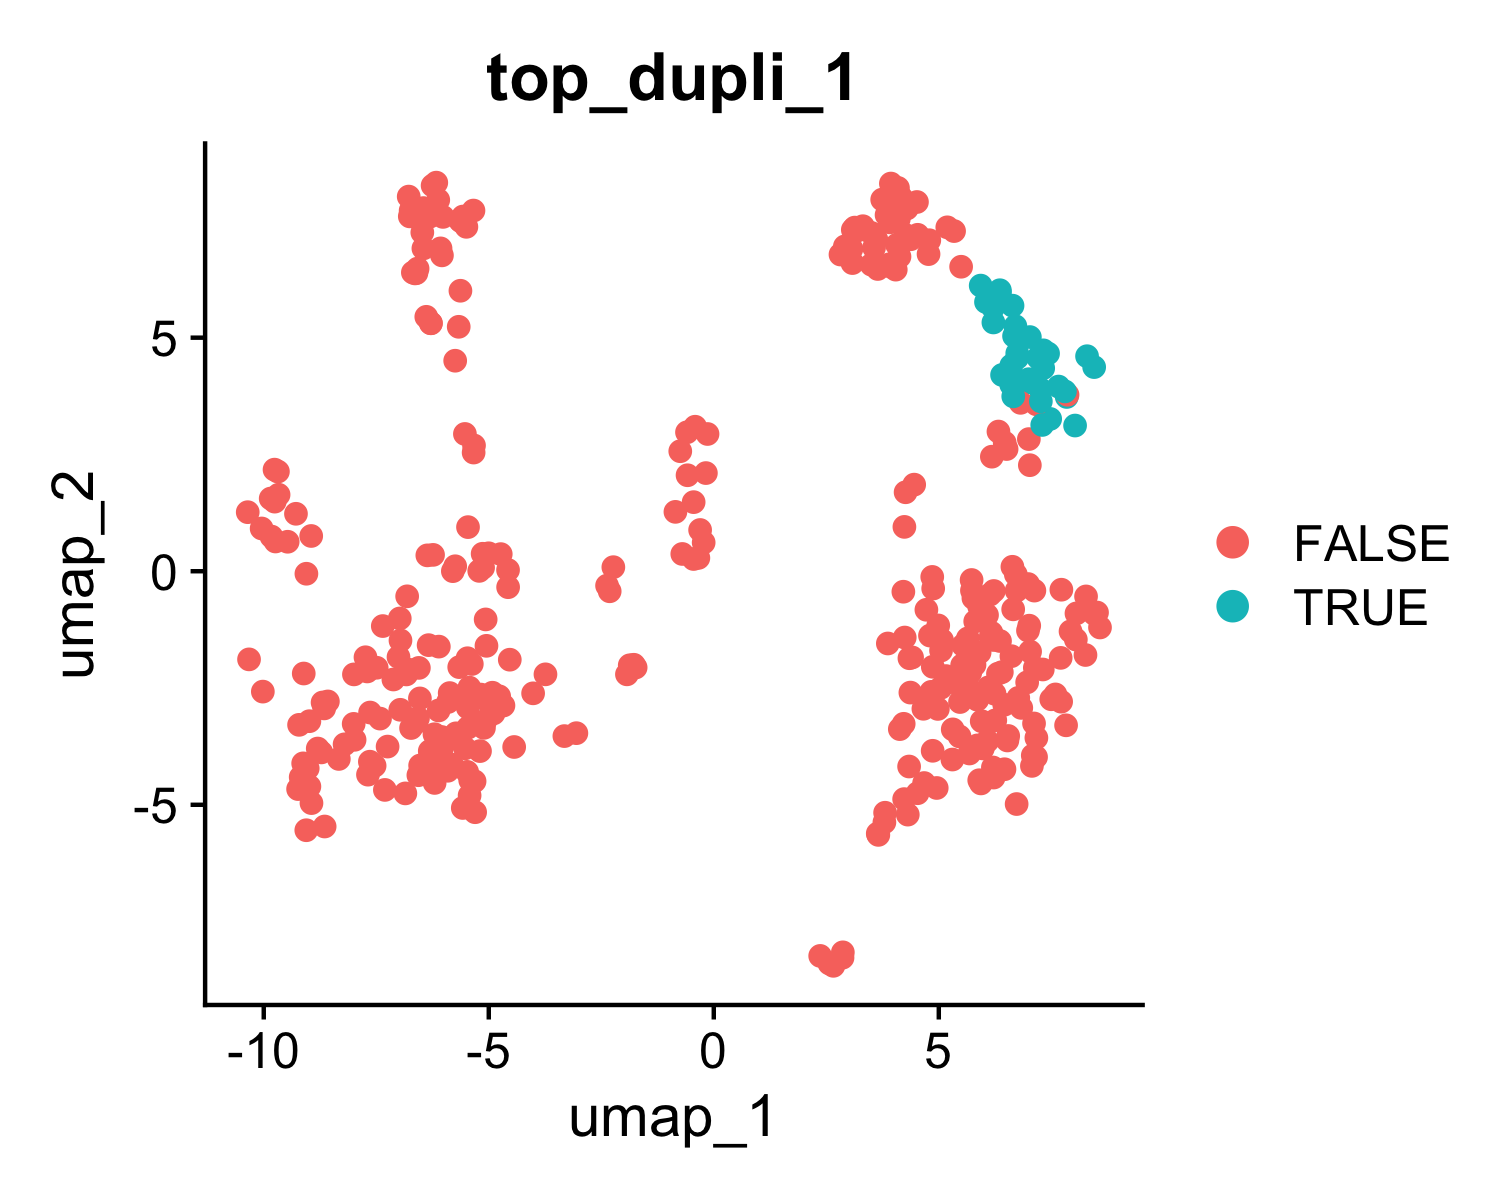

In [101]:
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 300)
p <- DimPlot(seurat_obj_infercnv, reduction="umap", group.by="top_dupli_1", pt.size=2.0)
p

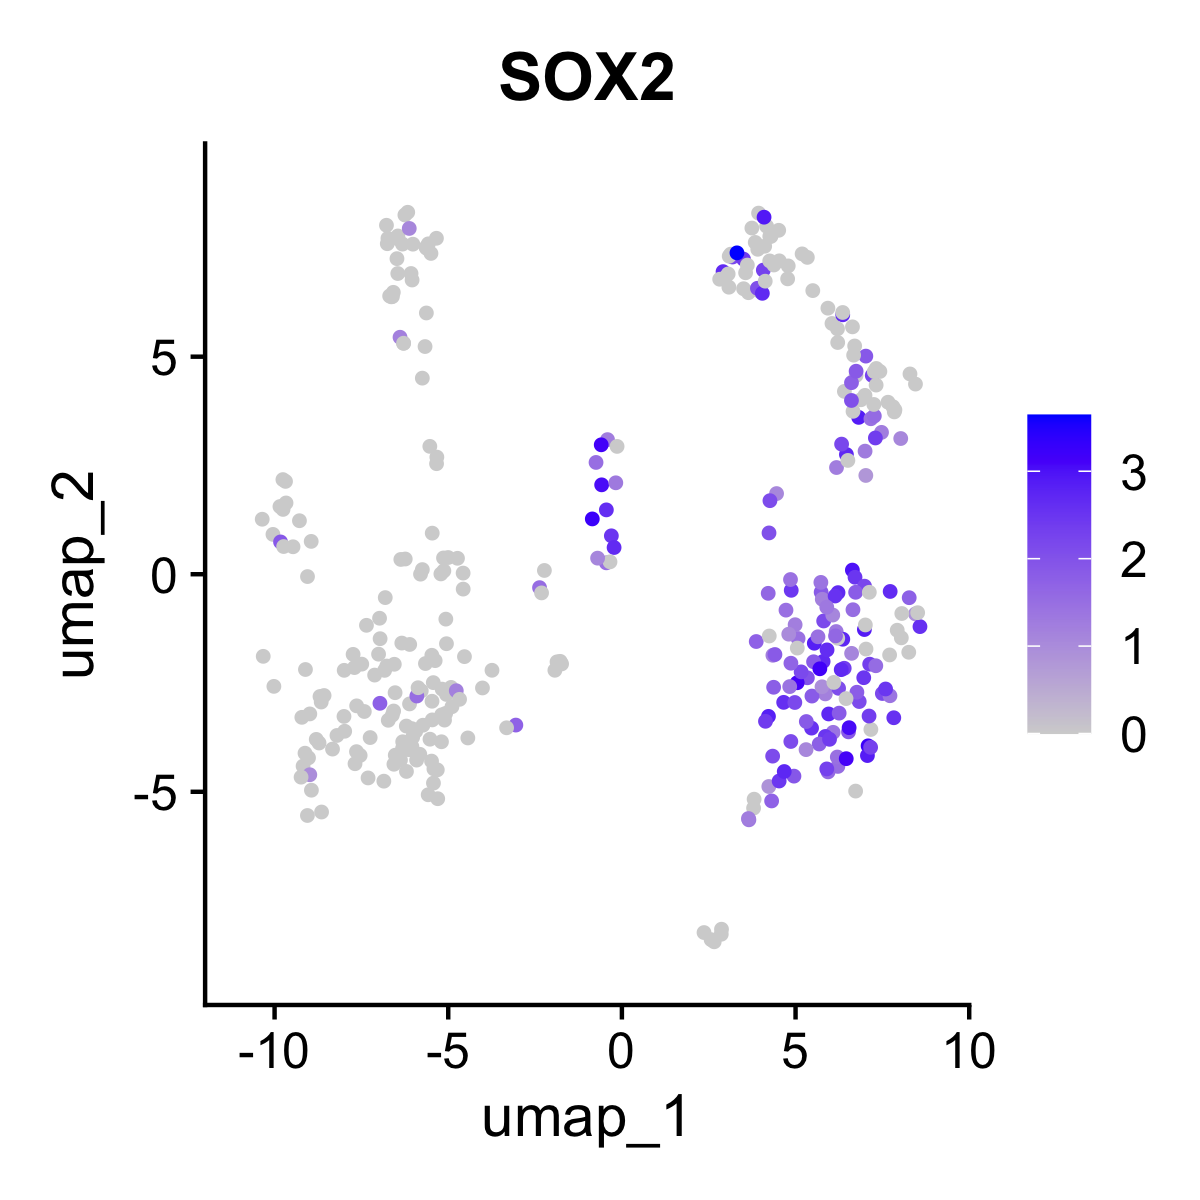

In [128]:
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 300)
p <- FeaturePlot(seurat_obj_infercnv, reduction="umap", features="SOX2")
p

In [72]:
library(repr)

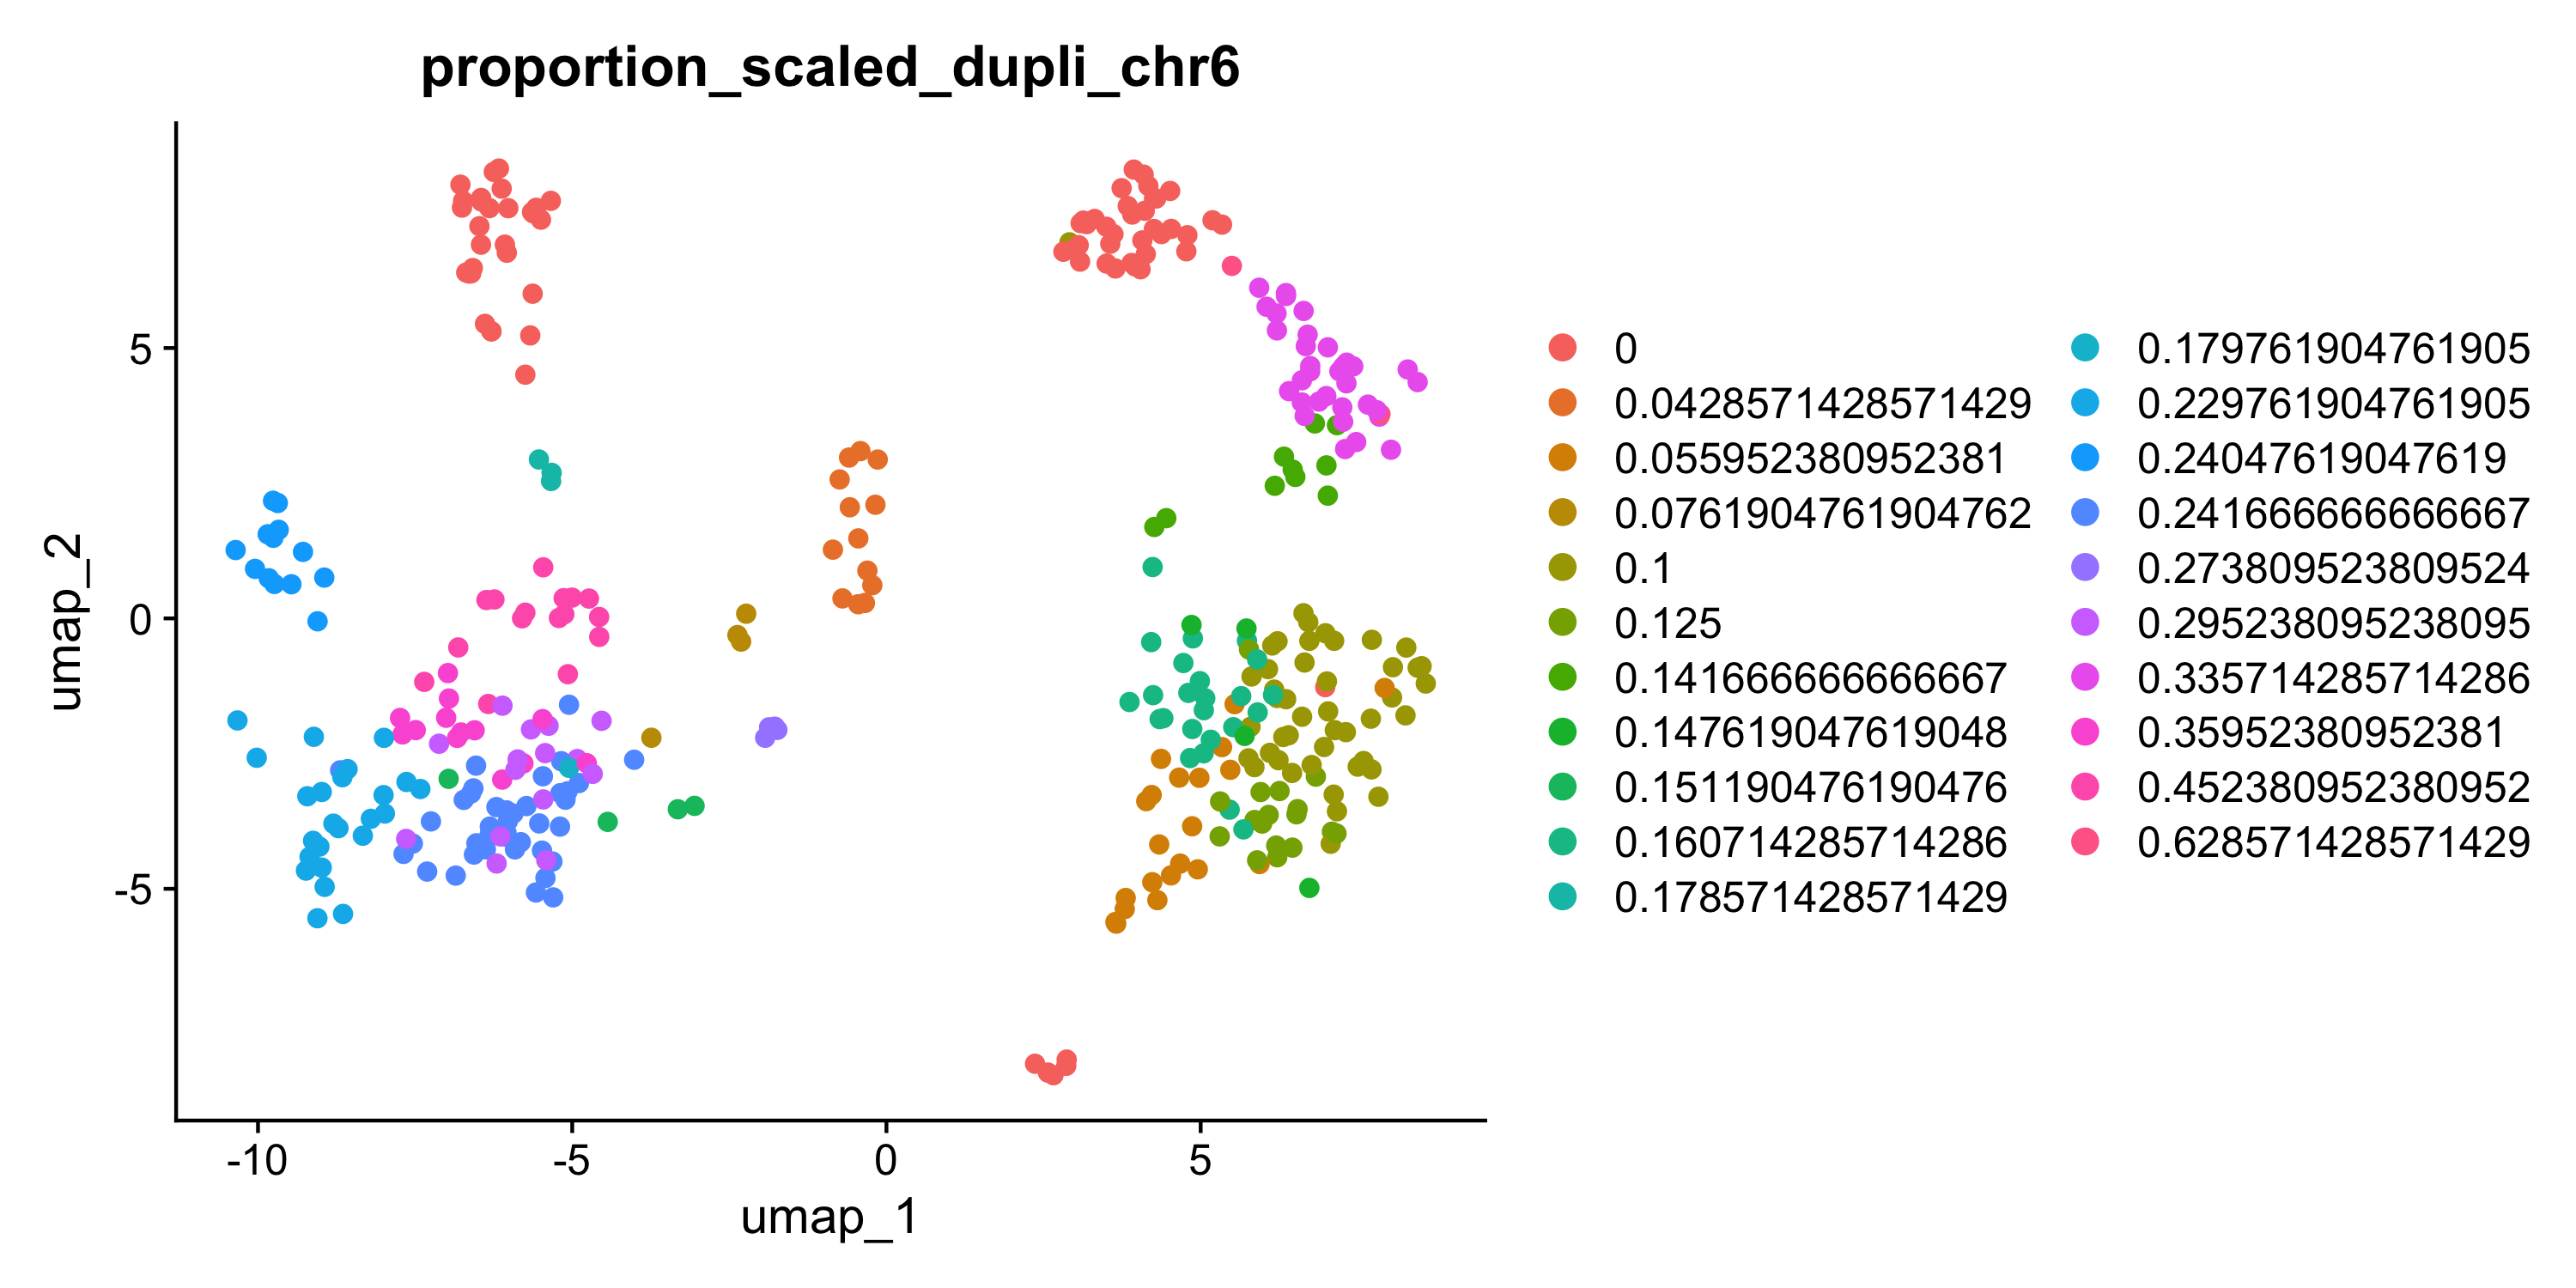

In [75]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 300)
p <- DimPlot(seurat_obj_infercnv, reduction="umap", group.by="proportion_scaled_dupli_chr6", pt.size=2.0)
p

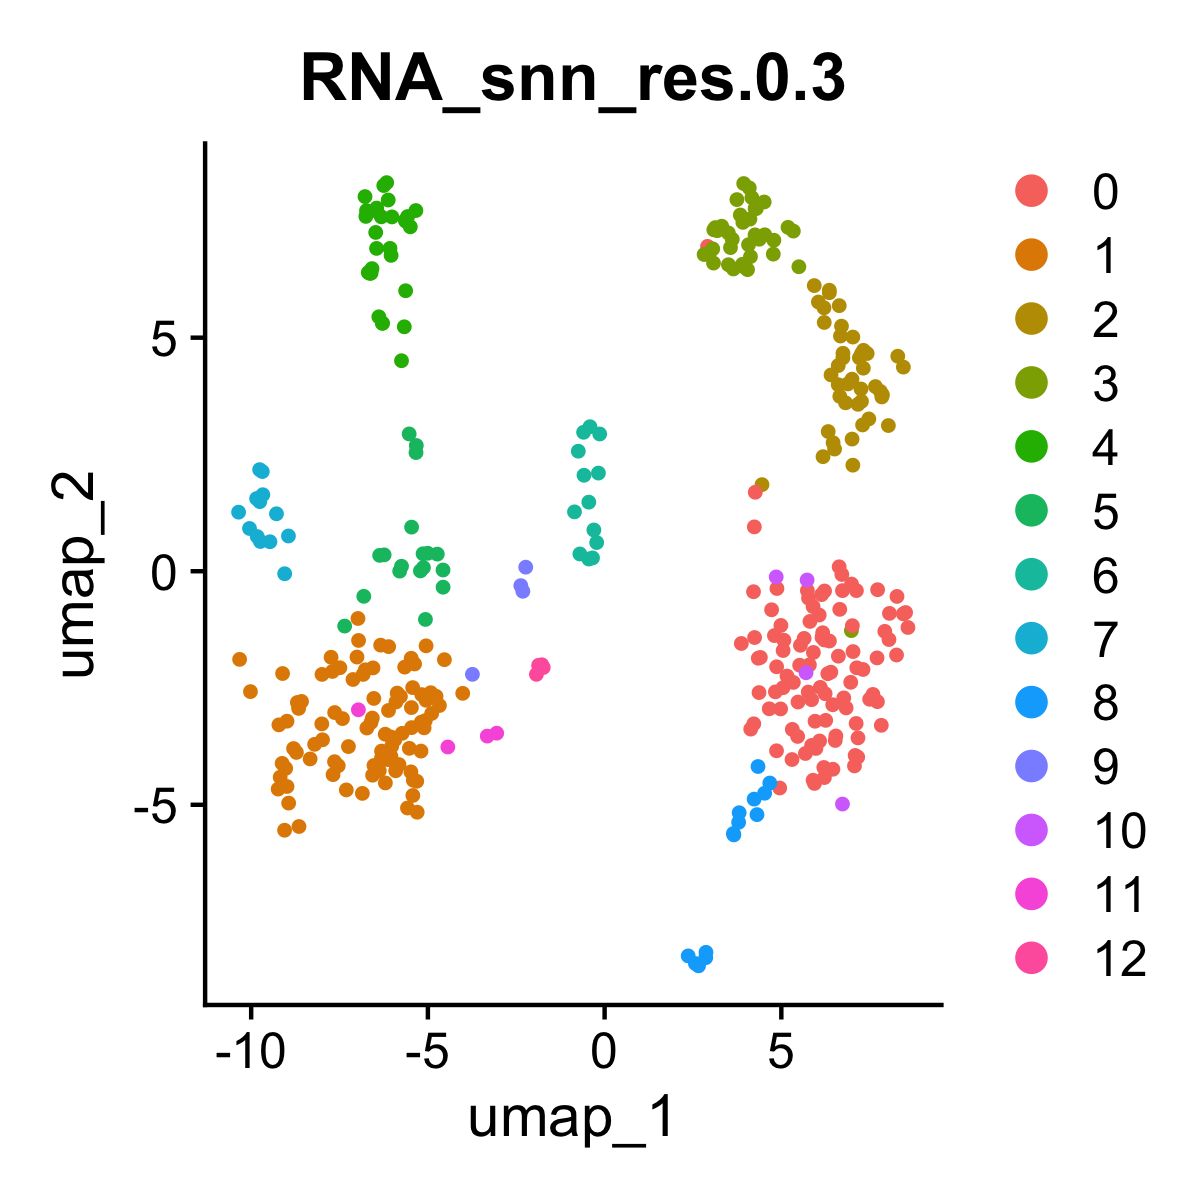

In [80]:
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 300)
p <- DimPlot(seurat_obj_infercnv, reduction="umap", group.by="RNA_snn_res.0.3", pt.size=1.0)
p

In [5]:



# Plot CNV Heatmap
p <- infercnv::plot_cnv(
    infercnv_obj,
    output_format = "png",
    title = "inferCNV Heatmap",
    cluster_by_groups = TRUE
)


ggsave(p, "./out/infercnv_heatmap.png")
p



INFO [2024-12-25 12:39:36] ::plot_cnv:Start
INFO [2024-12-25 12:39:36] ::plot_cnv:Current data dimensions (r,c)=7987,4196 Total=33636607.8991153 Min=0.661783110791307 Max=1.78280317560868.
INFO [2024-12-25 12:39:36] ::plot_cnv:Depending on the size of the matrix this may take a moment.
INFO [2024-12-25 12:39:36] plot_cnv(): auto thresholding at: (0.841730 , 1.165620)
INFO [2024-12-25 12:39:37] plot_cnv_observation:Start
INFO [2024-12-25 12:39:37] Observation data size: Cells= 2912 Genes= 7987
INFO [2024-12-25 12:39:37] plot_cnv_observation:Writing observation groupings/color.
INFO [2024-12-25 12:39:37] plot_cnv_observation:Done writing observation groupings/color.
INFO [2024-12-25 12:39:37] plot_cnv_observation:Writing observation heatmap thresholds.
INFO [2024-12-25 12:39:37] plot_cnv_observation:Done writing observation heatmap thresholds.
INFO [2024-12-25 12:39:40] Colors for breaks:  #00008B,#24249B,#4848AB,#6D6DBC,#9191CC,#B6B6DD,#DADAEE,#FFFFFF,#EEDADA,#DDB6B6,#CC9191,#BC6D6D,#AB

ERROR: [1m[33mError[39m in `ggsave()`:[22m
[33m![39m `filename` must be a single string, not a list.
